## Importing the data 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin
from scipy.sparse import csr_matrix
import scipy.sparse


In [2]:
# Load and display training data
train_filepath = "train_data.txt"
train_columns = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
train_data = pd.read_csv(train_filepath, sep=':::', names=train_columns)
print("Training Data:")
display(train_data.head())
print(f"Training Data Shape: {train_data.shape}\n")

# Load and display test data
test_filepath = "test_data.txt"
test_data = pd.read_csv(test_filepath, sep=':::', names=train_columns)  # Using the same column names as training data
print("Test Data:")
display(test_data.head())
print(f"Test Data Shape: {test_data.shape}\n")

# Load and display test solution data
test_solution_filepath = "test_data_solution.txt"
test_solution_data = pd.read_csv(test_solution_filepath, sep=':::', names=train_columns)  # Using the same column names
print("Test Solution Data:")
display(test_solution_data.head())
print(f"Test Solution Data Shape: {test_solution_data.shape}")

Training Data:


C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\3046436074.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv(train_filepath, sep=':::', names=train_columns)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\3046436074.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv(test_filepath, sep=':::', names=train_columns)  # Using the same column names as training data


Training Data Shape: (54214, 4)

Test Data:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


Test Data Shape: (54200, 4)

Test Solution Data:


C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\3046436074.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv(test_solution_filepath, sep=':::', names=train_columns)  # Using the same column names


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


Test Solution Data Shape: (54200, 4)


## Performing some data visualization method

C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\1350594781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_data['GENRE'], order=train_data['GENRE'].value_counts().index, palette='viridis')


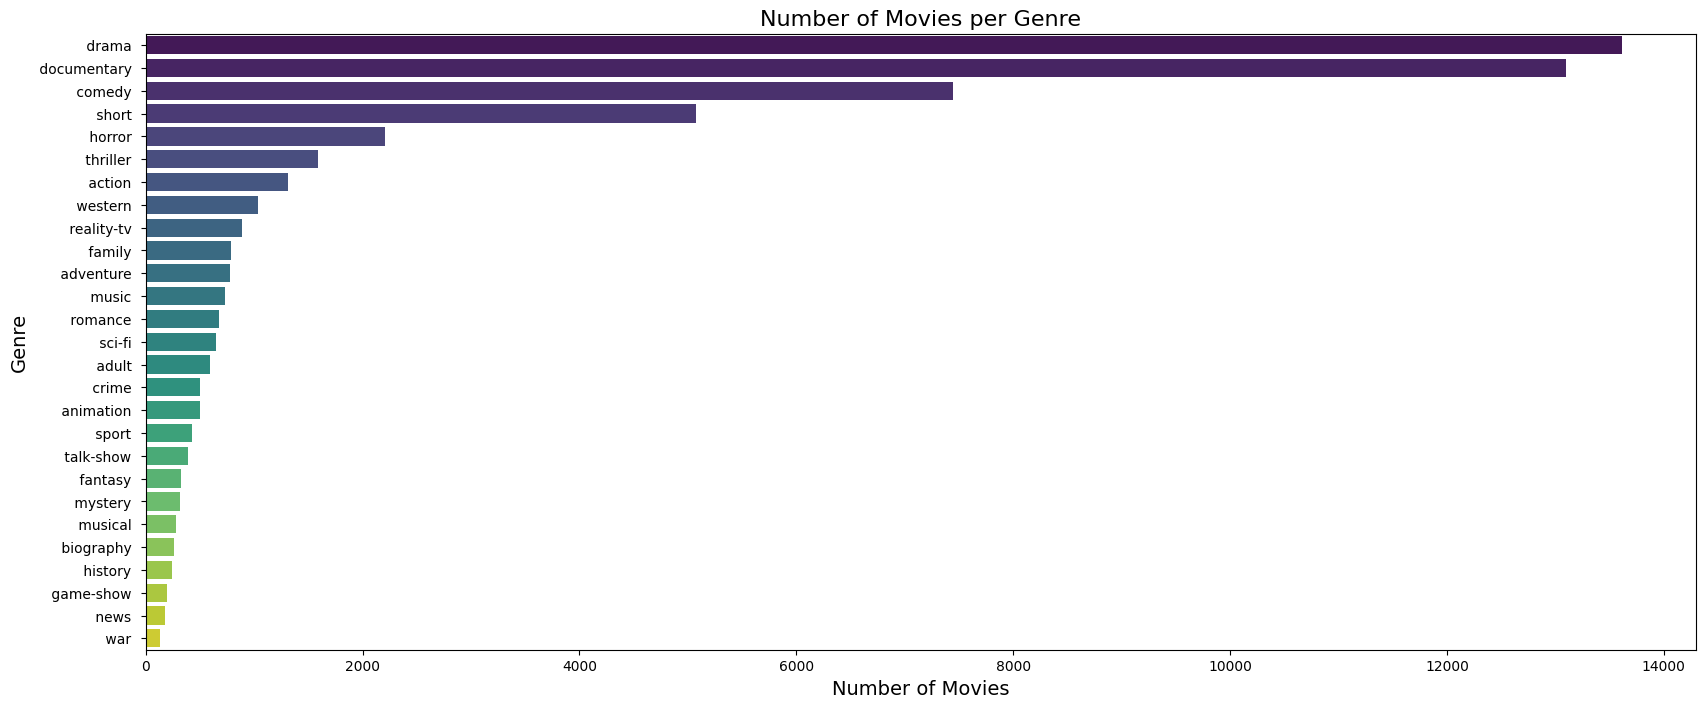

In [3]:
# Set the size of the figure
plt.figure(figsize=(20, 8))

# Plot a countplot for the 'GENRE' column
sns.countplot(y=train_data['GENRE'], order=train_data['GENRE'].value_counts().index, palette='viridis')

# Set title and labels
plt.title('Number of Movies per Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Display the plot
plt.show()

## Bar Representation of Genre vs Description length

C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\540792491.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data, palette='viridis')


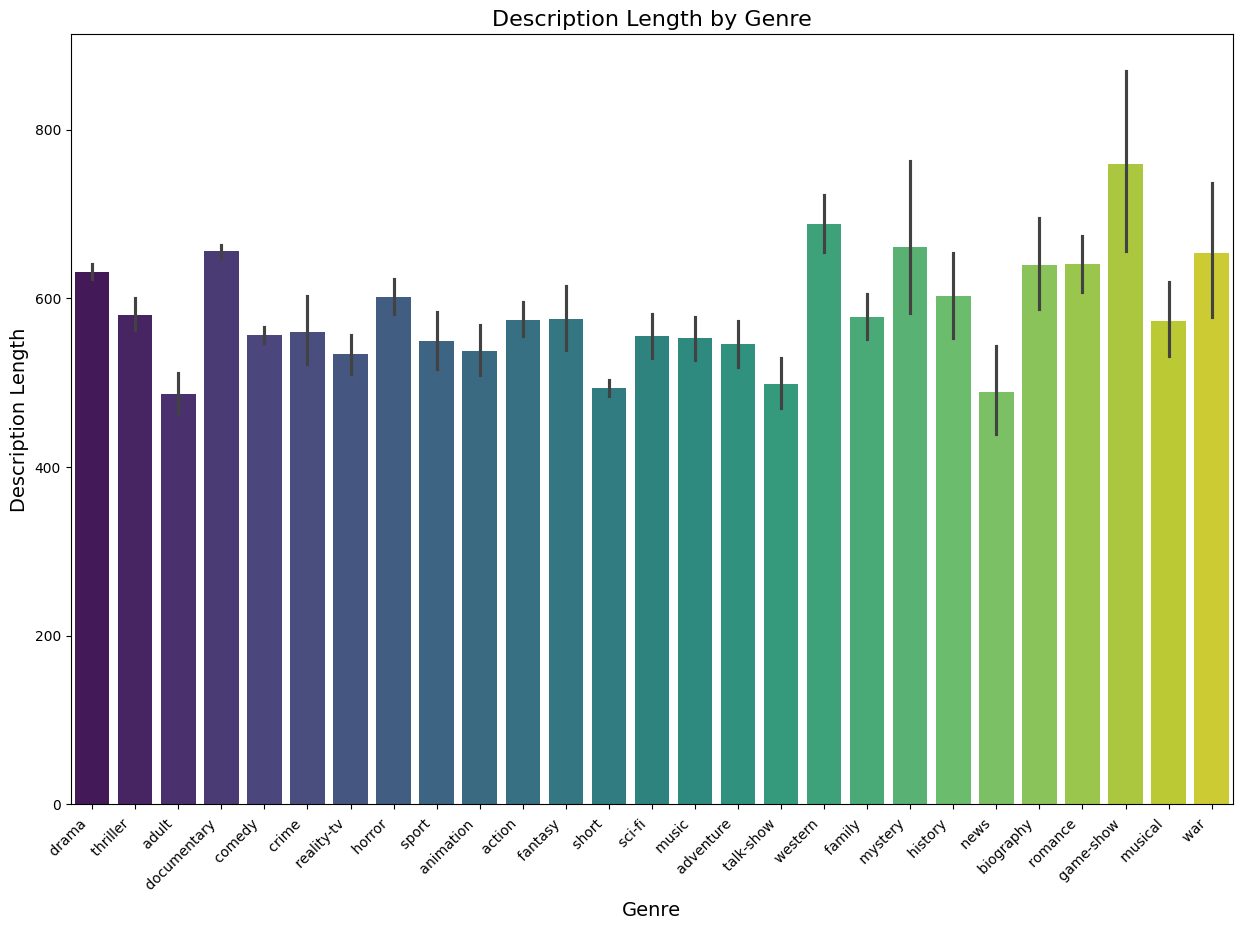

In [4]:
# Calculate the length of each description and create a new column
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Plot a barplot of description length by genre
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data, palette='viridis')

# Set title and labels
plt.title('Description Length by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Description Length', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

## Now to get to known about top genre which mostly people watched

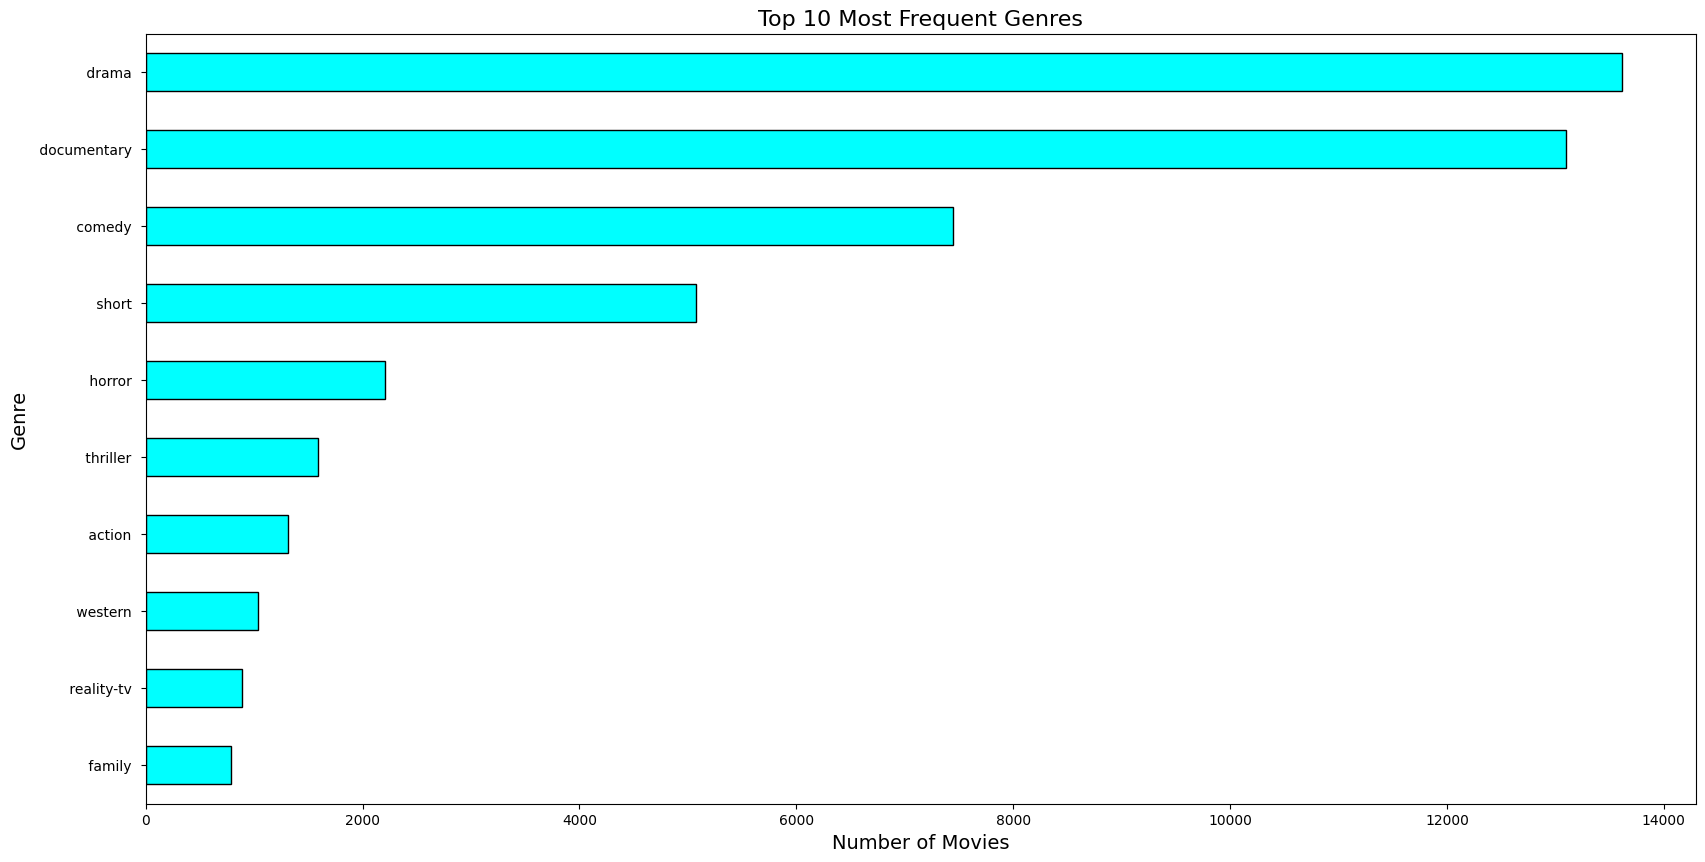

In [5]:
# Get the top 10 most frequent genres
top_genres = train_data['GENRE'].value_counts().head(10)

# Set the size of the figure
plt.figure(figsize=(20, 10))

# Plot a horizontal bar chart for the top genres
top_genres.plot(kind='barh', color='cyan', edgecolor='black')  # Added edgecolor for better visibility

# Set title and labels
plt.title('Top 10 Most Frequent Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Invert y-axis to have the genre with the most movies at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

## now training and testing of the data 

In [6]:
# Handle any potential missing values in the 'DESCRIPTION' column
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)

# Transform the training and test data descriptions into TF-IDF features
X_train = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])

# Use LabelEncoder to convert genre labels into numerical format
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\1506644293.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data['DESCRIPTION'].fillna("", inplace=True)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Split the training data into training and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train a Linear Support Vector Machine (SVM) classifier
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_sub, y_train_sub)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Evaluate the model performance on the validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Display the classification report for the validation set
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))


C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [8]:
# Make predictions on the test set using the trained classifier
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Display the classification report for the test set
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [9]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [10]:
Mnb_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [11]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [12]:
lr_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

## Now designing a function show that we can predict the genre of the movie

C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\3967229053.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv(train_filepath, sep=':::', names=train_columns)


Training Data:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


Training Data Shape: (54214, 4)

Test Data:


C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\3967229053.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv(test_filepath, sep=':::', names=train_columns)  # Using the same column names as training data


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


Test Data Shape: (54200, 4)

Test Solution Data:


C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\3967229053.py:29: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv(test_solution_filepath, sep=':::', names=train_columns)  # Using the same column names


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


Test Solution Data Shape: (54200, 4)


C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\3967229053.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_data['GENRE'], order=train_data['GENRE'].value_counts().index, palette='viridis')


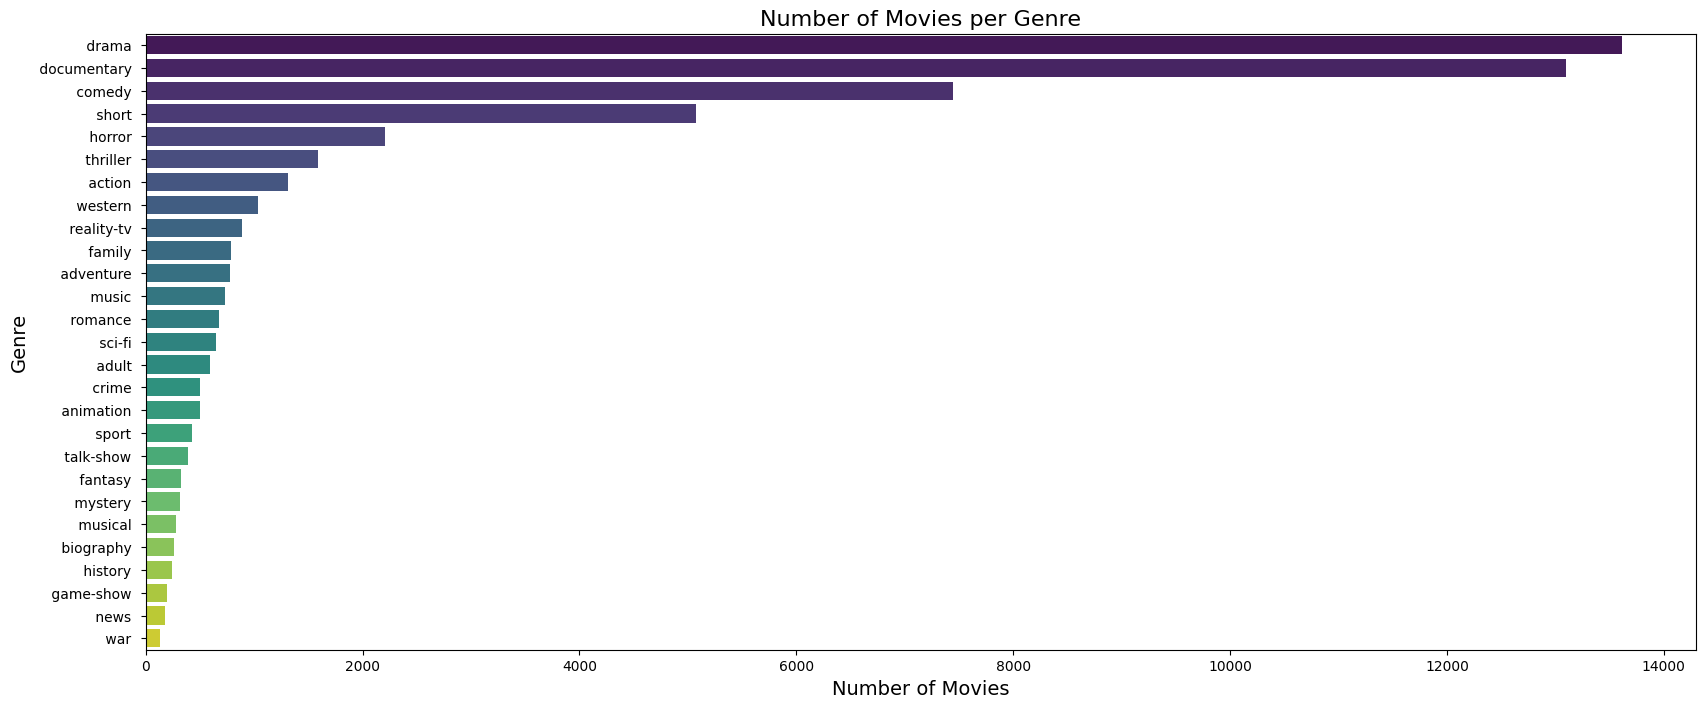

C:\Users\SsDsS\AppData\Local\Temp\ipykernel_21648\3967229053.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data, palette='viridis')


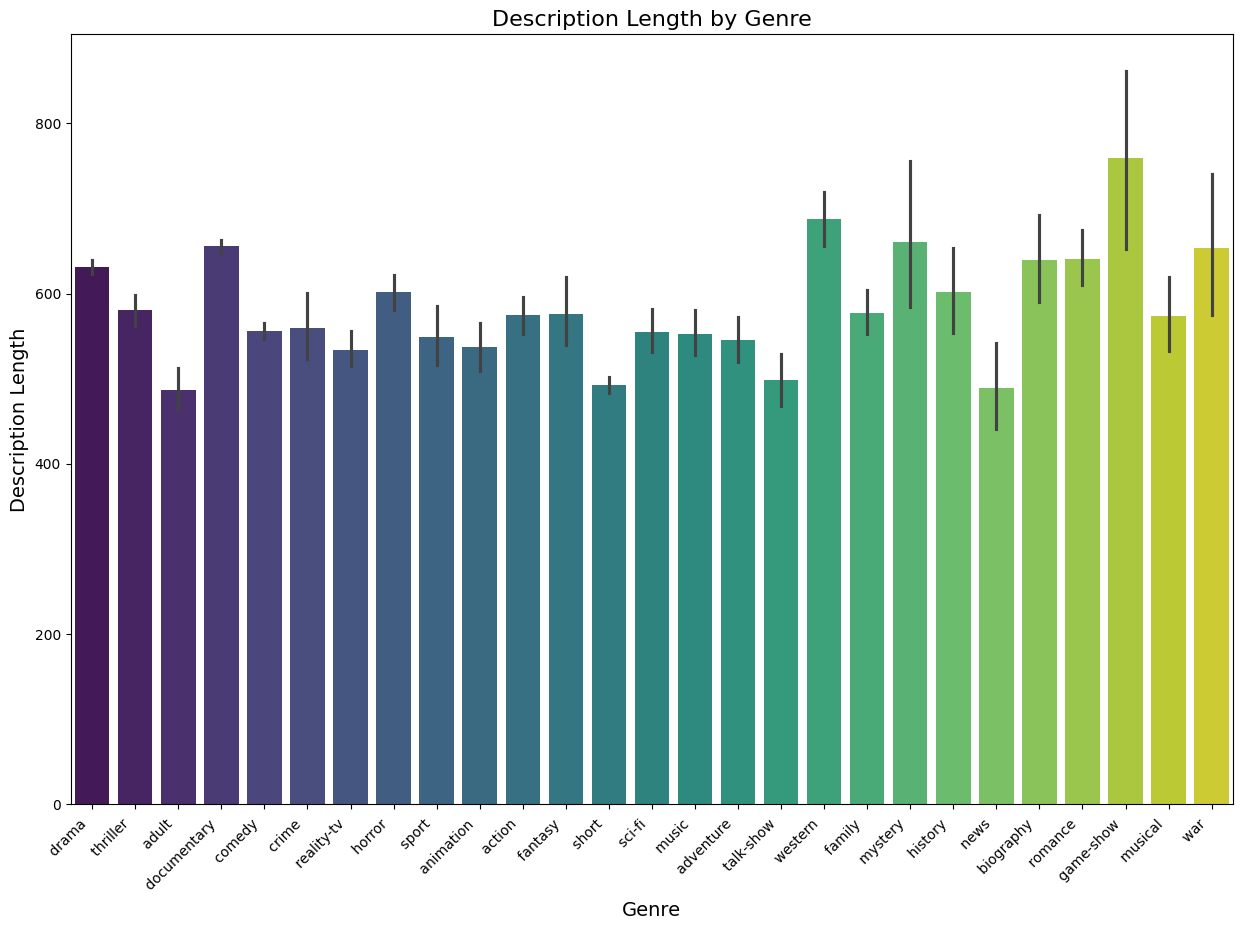

C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Validation Accuracy: 0.5857235082541732
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.31      0.39       263
           1       0.78      0.44      0.56       112
           2       0.46      0.22      0.30       139
           3       0.50      0.13      0.21       104
           4       0.00      0.00      0.00        61
           5       0.51      0.58      0.54      1443
           6       0.29      0.04      0.07       107
           7       0.69      0.83      0.75      2659
           8       0.56      0.74      0.64      2697
           9       0.42      0.15      0.22       150
          10       0.33      0.03      0.05        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.64      0.64      0.64       431
          14       0.61      0.55      0.58       144
          15       0.50      0.04      0.07        50
      

C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Logistic Regression Test Accuracy: 0.2511439114391144
Multinomial Naive Bayes Test Accuracy: 0.2511439114391144


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Load and display training data
train_filepath = "train_data.txt"
train_columns = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
train_data = pd.read_csv(train_filepath, sep=':::', names=train_columns)
print("Training Data:")
display(train_data.head())
print(f"Training Data Shape: {train_data.shape}\n")

# Load and display test data
test_filepath = "test_data.txt"
test_data = pd.read_csv(test_filepath, sep=':::', names=train_columns)  # Using the same column names as training data
print("Test Data:")
display(test_data.head())
print(f"Test Data Shape: {test_data.shape}\n")

# Load and display test solution data
test_solution_filepath = "test_data_solution.txt"
test_solution_data = pd.read_csv(test_solution_filepath, sep=':::', names=train_columns)  # Using the same column names
print("Test Solution Data:")
display(test_solution_data.head())
print(f"Test Solution Data Shape: {test_solution_data.shape}")

# Set the size of the figure
plt.figure(figsize=(20, 8))

# Plot a countplot for the 'GENRE' column
sns.countplot(y=train_data['GENRE'], order=train_data['GENRE'].value_counts().index, palette='viridis')

# Set title and labels
plt.title('Number of Movies per Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Display the plot
plt.show()

# Calculate the length of each description and create a new column
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Plot a barplot of description length by genre
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data, palette='viridis')

# Set title and labels
plt.title('Description Length by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Description Length', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

# Handle any potential missing values in the 'DESCRIPTION' column
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].astype(str)  # Explicitly cast to string dtype
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].astype(str)    # Explicitly cast to string dtype

train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

# Feature engineering: Use tokenization and n-grams
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100000, tokenizer=lambda x: x.split(), ngram_range=(1, 2))

# Extract features (descriptions) and labels (genres)
data = train_data['DESCRIPTION'].tolist()
labels = train_data['GENRE'].tolist()

# Create and fit the vectorizer
X = tfidf_vectorizer.fit_transform(data)

# Use LabelEncoder to convert genre labels into numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Support Vector Machine (SVM) classifier
svm_classifier = LinearSVC(dual=False)  # Set dual to False to suppress the warning
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Evaluate the model performance on the validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Display the classification report for the validation set
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Make predictions on the test set using the trained classifier
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the model performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Display the classification report for the test set
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Initialize and train a Logistic Regression classifier with increased max_iter
lr_classifier = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning
lr_classifier.fit(X_train, y_train)

# Optionally, you can also try other classifiers like Multinomial Naive Bayes
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)

# Make predictions using the trained classifiers
y_test_pred_lr = lr_classifier.predict(X_test)
y_test_pred_mnb = mnb_classifier.predict(X_test)

# Evaluate the performance of other classifiers on the test set
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_accuracy_mnb = accuracy_score(y_test, y_test_pred_mnb)

print("Logistic Regression Test Accuracy:", test_accuracy_lr)
print("Multinomial Naive Bayes Test Accuracy:", test_accuracy_mnb)
